In [2]:

#Import neccessary packeges
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests
import io

In [3]:

# read the given csv file in pandas dataframe.
df = pd.read_csv(r'C:\Users\Admin\Desktop\Datascience\Portfolio Projects\Python\Twitter archive Data Wrangling\twitter_archive_enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Load jason.txt file in pandas dataframe from given url.
json_url = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r = requests.get(json_url)
data = r.content.decode('utf-8')
json_tweets = pd.read_json(data, lines = True)
json_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [5]:
# only keep useful column.
json_tweets = json_tweets[['id', 'display_text_range', 'favorite_count','retweet_count']]
json_tweets.head()

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


In [6]:

json_tweets.tail()

,id,display_text_range,favorite_count,retweet_count
2349,666049248165822465,"[0, 120]",111,41
2350,666044226329800704,"[0, 137]",311,147
2351,666033412701032449,"[0, 130]",128,47
2352,666029285002620928,"[0, 139]",132,48
2353,666020888022790149,"[0, 131]",2535,532


In [7]:
# load image-predictions.tsv file from the given url.
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url).content
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), delimiter='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Part 2: Data Assessing
Assessing df dataset which is in .csv file.

In [8]:

df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:

df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
df.duplicated().any()

False

In [13]:
df.duplicated().sum()

0

In [14]:
# Assessing wether a tweet is retweet or not.
df[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any()

retweeted_status_id           True
retweeted_status_user_id      True
retweeted_status_timestamp    True
dtype: bool

In [15]:

df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [17]:
df.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [18]:

df.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [19]:

df[df['retweeted_status_id'].notnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [20]:

df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:

# Select rows which contain '&amp' instead '&' in text column.
df[df.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


In [22]:
json_tweets.head()

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


In [23]:

json_tweets.tail()

,id,display_text_range,favorite_count,retweet_count
2349,666049248165822465,"[0, 120]",111,41
2350,666044226329800704,"[0, 137]",311,147
2351,666033412701032449,"[0, 130]",128,47
2352,666029285002620928,"[0, 139]",132,48
2353,666020888022790149,"[0, 131]",2535,532


In [24]:

json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   display_text_range  2354 non-null   object
 2   favorite_count      2354 non-null   int64 
 3   retweet_count       2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [25]:

json_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [26]:

json_tweets.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          id  display_text_range  favorite_count  retweet_count
0     False               False           False          False
1     False               False           False          False
2     False               False           False          False
3     False               False           False          False
4     False               False           False          False
...     ...                 ...             ...            ...
2349  False               False           False          False
2350  False               False           False          False
2351  False               False           False          False
2352  False               False           False          False
2353  False               False           False          False

[2354 rows x 4 columns]>

In [27]:

json_tweets.dtypes

id                     int64
display_text_range    object
favorite_count         int64
retweet_count          int64
dtype: object

In [28]:

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:

image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [30]:

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:

image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:

image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [33]:
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [34]:
image_predictions.duplicated().sum()

0

In [35]:
image_predictions.duplicated().any()

False

# Data Issues: I found 12 quality issues and 4 tidiness issues
** Tidiness Issues ( Content Issues) **

1. numerator_rating and denominator should me merge in one coloumn instead of two column.

2. Create dog stage variable and remove individual dog stage columns.

3. There is a incomplete data in some file so i perform merge operation to combine all the file for analysis.

** Quality Issues **

4. There is inappropriate column name for json file.

5. In name column there are multiple expression which are wrongly name convert these wrongly name to none.

6. Split date and time in two seperate column instead of one column.

7. change 'tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' from float to integer

8. Drop the rows when the values of retweet_ids are not none.

9. There are missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'. The columns can be dropped since they are not relevant for analysis purpose.

10. Change missing values in 'name' from 'None' to NaN

11. Remove tweet without rating

12. Remove extra character after '&' in text column of text file.

13. Remove "-" in P1, P2, P3 Using replace function

14. Change all string in p1, p2, p3 in lower case.

# Part 3: Data Cleaning
* Cleaning df dataset which is in .csv file.

In [36]:

df_clean = df.copy()

# 1) Define:
* numerator_rating and denominator should be merged in one column instead of two columns.
* Fix tideness issues.

# Code:

In [37]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_1880\4272257327.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [38]:

rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
df_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

In [39]:

# add numerator and denominator in to one column.
df_clean['rating'] = df_clean['rating_numerator'].astype(str) + "/" + df_clean['rating_denominator'].astype(str)

# Test:

In [40]:

df_clean.rating.head(50)

0     13.0/10.0
1     13.0/10.0
2     12.0/10.0
3     13.0/10.0
4     12.0/10.0
5     13.0/10.0
6     13.0/10.0
7     13.0/10.0
8     13.0/10.0
9     14.0/10.0
10    13.0/10.0
11    13.0/10.0
12    13.0/10.0
13    12.0/10.0
14    13.0/10.0
15    13.0/10.0
16    12.0/10.0
17    13.0/10.0
18    13.0/10.0
19    13.0/10.0
20    12.0/10.0
21    13.0/10.0
22    14.0/10.0
23    13.0/10.0
24    13.0/10.0
25    12.0/10.0
26    13.0/10.0
27    13.0/10.0
28    13.0/10.0
29    12.0/10.0
30    12.0/10.0
31    13.0/10.0
32    12.0/10.0
33    12.0/10.0
34    13.0/10.0
35    14.0/10.0
36    13.0/10.0
37    13.0/10.0
38    12.0/10.0
39    13.0/10.0
40    13.0/10.0
41    14.0/10.0
42    13.0/10.0
43    12.0/10.0
44    12.0/10.0
45    13.5/10.0
46    13.0/10.0
47    13.0/10.0
48    13.0/10.0
49    12.0/10.0
Name: rating, dtype: object

In [41]:

df_clean = df_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

In [42]:

df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,13.0/10.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,13.0/10.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,12.0/10.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,13.0/10.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,12.0/10.0


# 2) Define:
* Split date and time in two seperate column instead of one column.
* Fixing quality issues.

# Code:

In [43]:

# I use str.split function on timestamp column to split in two different column called date and time column.
df_clean['date'], df_clean['time'] = df_clean['timestamp'].str.split(' ',1).str
df_clean = df_clean.drop('timestamp', axis = 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1880\2542441392.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_clean['date'], df_clean['time'] = df_clean['timestamp'].str.split(' ',1).str


# Test:

In [44]:
df_clean[['date', 'time']].head()


,date,time
0,2017-08-01,16:23:56 +0000
1,2017-08-01,00:17:27 +0000
2,2017-07-31,00:18:03 +0000
3,2017-07-30,15:58:51 +0000
4,2017-07-29,16:00:24 +0000


In [45]:

# I use rstrip function to remove '+0000' part from whole text.
df_clean['time'] = df_clean['time'].str.rstrip('+0000')

In [46]:
df_clean['time'].head()

0    16:23:56 
1    00:17:27 
2    00:18:03 
3    15:58:51 
4    16:00:24 
Name: time, dtype: object

# 3) Define:
* In name column there are multiple expression which are wrongly name convert these wrongly name to none.
* Fixing quality issues.

# Code:

In [47]:
# I use replace function to convert wrong name to none. First I make list of wrong name after that i perform replace opertaion on that.
name = ['a','an','the','light','life','by','actually','just','getting','infuriating','old','all','this','very',
              'mad','not','one','my','O','quite','such']
df_clean['name'] = df_clean['name'].replace(name , 'none' )

# Test:

In [48]:

df_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        none
2353        none
2354        none
2355        None
Name: name, Length: 2356, dtype: object

# Define 4:
* change 'tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' from float to string.
* Fixing quality issues.

# Code:


In [49]:
# I use astype function on the above column which have inappropriate data types.
ids = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
df_clean[ids] = df_clean[ids].astype(str)

#  Test:

In [50]:

df_clean.dtypes

tweet_id                       int64
in_reply_to_status_id         object
in_reply_to_user_id           object
source                        object
text                          object
retweeted_status_id           object
retweeted_status_user_id      object
retweeted_status_timestamp    object
expanded_urls                 object
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
rating                        object
date                          object
time                          object
dtype: object

# Define 5:
* Drop the rows when the values of retweet_ids are not none.
* Fixing quality issues.

# Code:

In [51]:
# By using not equal to operator i filter the row whose status id is not equal to none.
df_clean[df_clean.retweeted_status_id != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating,date,time
19,888202515573088257,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874739571039519e+17,4196983835.0,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,Canela,None,None,None,None,13.0/10.0,2017-07-21,01:02:36
32,886054160059072513,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537344211026e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,None,None,None,None,None,12.0/10.0,2017-07-15,02:45:48
36,885311592912609280,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833205850685e+17,4196983835.0,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,Lilly,None,None,None,None,13.0/10.0,2017-07-13,01:35:06
68,879130579576475649,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576130401157e+17,4196983835.0,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,Emmy,None,None,None,None,14.0/10.0,2017-06-26,00:13:58
73,878404777348136964,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815110064783e+17,4196983835.0,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",Shadow,None,None,None,None,13.0/10.0,2017-06-24,00:09:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667242938778e+17,4196983835.0,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,Shaggy,None,None,None,None,10.0/10.0,2016-06-25,01:52:36
1043,743835915802583040,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671382696715059e+17,4196983835.0,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,None,None,None,None,None,10.0/10.0,2016-06-17,16:01:16
1242,711998809858043904,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119982797733478e+17,783214.0,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,None,None,None,None,None,12.0/10.0,2016-03-21,19:31:59
2259,667550904950915073,nan,nan,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675486956640707e+17,4296831739.0,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,None,None,None,None,None,12.0/10.0,2015-11-20,03:51:52


In [52]:
#By using drop function i drop retweet_ids whose value is equal to none.
df_clean.drop(df_clean[df_clean.retweeted_status_id != 'nan'].index , inplace=True )

# Test:

In [53]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating,date,time
0,892420643555336193,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,13.0/10.0,2017-08-01,16:23:56
1,892177421306343426,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,13.0/10.0,2017-08-01,00:17:27
2,891815181378084864,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,12.0/10.0,2017-07-31,00:18:03
3,891689557279858688,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,13.0/10.0,2017-07-30,15:58:51
4,891327558926688256,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,12.0/10.0,2017-07-29,16:00:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,None,None,None,None,None,5.0/10.0,2015-11-16,00:24:50
2352,666044226329800704,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226...,none,None,None,None,None,6.0/10.0,2015-11-16,00:04:52
2353,666033412701032449,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412...,none,None,None,None,None,9.0/10.0,2015-11-15,23:21:54
2354,666029285002620928,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,none,None,None,None,None,7.0/10.0,2015-11-15,23:05:30


# Define 6:
* There are missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'. The columns can be dropped  since they are not relevant for analysis purpose.
* Fixing quality issues.

# Code:

In [54]:
# The above column are not useful for futher analysis because it have plenty of missing value. So i drop those column by using drop function.
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

# Test:

In [55]:

df_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'rating', 'date', 'time'],
      dtype='object')

# Define 7:
* Create dog stage variable and remove individual dog stage columns.
* Fixing tideness issues.

# Code:

In [56]:
df_clean['stage'] = df_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

# for single one stage 
df_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True) 

# for multiple stages 
df_clean['stage'].replace("doggoNonepupperNone","multiple", inplace=True) 
df_clean['stage'].replace("doggoNoneNonepuppo","multiple", inplace=True) 
df_clean['stage'].replace("doggoflooferNoneNone","multiple", inplace=True)

# Test:

In [57]:

df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace = True)

In [58]:

df_clean

,tweet_id,source,text,expanded_urls,name,rating,date,time,stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13.0/10.0,2017-08-01,16:23:56,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13.0/10.0,2017-08-01,00:17:27,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12.0/10.0,2017-07-31,00:18:03,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13.0/10.0,2017-07-30,15:58:51,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12.0/10.0,2017-07-29,16:00:24,None
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,5.0/10.0,2015-11-16,00:24:50,None
2352,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,none,6.0/10.0,2015-11-16,00:04:52,None
2353,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,none,9.0/10.0,2015-11-15,23:21:54,None
2354,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,none,7.0/10.0,2015-11-15,23:05:30,None


In [59]:

# I call set_option function to display the full text by setting the colwidth to infinite. I did this because i was not able to read the whole tweet. So by doing this whole text is readable.
pd.set_option('display.max_colwidth', -1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1880\2790393797.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [60]:

df_clean.head(10)

,tweet_id,source,text,expanded_urls,name,rating,date,time,stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0/10.0,2017-08-01,16:23:56,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0/10.0,2017-08-01,00:17:27,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0/10.0,2017-07-31,00:18:03,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0/10.0,2017-07-30,15:58:51,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0/10.0,2017-07-29,16:00:24,None
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,13.0/10.0,2017-07-29,00:08:17,None
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\r\n\r\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,13.0/10.0,2017-07-28,16:27:12,None
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,13.0/10.0,2017-07-28,00:22:40,None
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13.0/10.0,2017-07-27,16:25:51,None
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,14.0/10.0,2017-07-26,15:59:51,doggo


# Define 8:
* Change missing values in 'name' from 'None' to NaN
* Fixing quality issues.

# Code:

In [61]:

# Again using replace method replace None to NaN.
df_clean['name'] = df_clean['name'].replace('None', np.NaN)

# Test:

In [62]:

df_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2175 non-null   int64 
 1   source         2175 non-null   object
 2   text           2175 non-null   object
 3   expanded_urls  2117 non-null   object
 4   name           1495 non-null   object
 5   rating         2175 non-null   object
 6   date           2175 non-null   object
 7   time           2175 non-null   object
 8   stage          2175 non-null   object
dtypes: int64(1), object(8)
memory usage: 169.9+ KB


# Define 9:
* Remove tweet without rating
* Fixing quality issues.

# Code:

In [63]:
# I remove the tweet without rating by using not equal to operator this operator mtches the tweet without rating.
df_clean = df_clean[df_clean.tweet_id != 810984652412424192]

# Test:

In [64]:
df_clean[df_clean.tweet_id == 810984652412424192]

,tweet_id,source,text,expanded_urls,name,rating,date,time,stage


# Define 10:
* Remove extra character after '&' in text column of text file.

# Code:

In [65]:
df_clean['text'] = df_clean.text.str.replace('&amp;', '&')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1880\2282163239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text'] = df_clean.text.str.replace('&amp;', '&')


# Test:

In [66]:
# By using replace I replace '&amp' with '&'
df_clean[df_clean['text'].str.contains('&amp;')]

,tweet_id,source,text,expanded_urls,name,rating,date,time,stage


# Define 11:
***** Cleaning image_prediction file ******

* Remove "-" in P1, P2, P3 Using replace function
* Fixing quality issues.

# Code:

In [67]:

image_predictions_clean = image_predictions.copy()

In [68]:

image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [69]:

# By using replace function. I replace "-" with blank space.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

# Test:

In [70]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


# Define 12:
* Change all string in p1, p2, p3 in lower case.
* Fixing quality issues.

# Code:

In [71]:

#By using lower function i changes all the text in p1,p2,p3 column in to the lower text.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

# Test:

In [72]:

image_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese mountain dog,0.651137,True,english springer,0.263788,True,greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


# Define 13:
**** Cleaning json_tweets file ****

* Rename id with tweet_id.
* Fixing quality issues.

# Code:

In [73]:

json_tweets_clean = json_tweets.copy()

In [74]:

json_tweets_clean.rename(columns= {'id':'tweet_id'}, inplace = True)

# Test:

In [75]:

json_tweets_clean.head()

,tweet_id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


# 14) Perform Final Merge Operation to create twitter_archive_master.csv file.

In [76]:
df_final = df_clean.merge(image_predictions_clean, on = 'tweet_id').merge(json_tweets_clean, on = 'tweet_id')

In [77]:
df_final

,tweet_id,source,text,expanded_urls,name,rating,date,time,stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,retweet_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0/10.0,2017-08-01,16:23:56,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,"[0, 85]",39467,8853
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0/10.0,2017-08-01,00:17:27,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,pekinese,0.090647,True,papillon,0.068957,True,"[0, 138]",33819,6514
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0/10.0,2017-07-31,00:18:03,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,"[0, 121]",25461,4328
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0/10.0,2017-07-30,15:58:51,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,"[0, 79]",42908,8964
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0/10.0,2017-07-29,16:00:24,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,"[0, 138]",41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,666049248165822465,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,5.0/10.0,2015-11-16,00:24:50,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,rottweiler,0.243682,True,doberman,0.154629,True,"[0, 120]",111,41
1989,666044226329800704,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,none,6.0/10.0,2015-11-16,00:04:52,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,redbone,0.360687,True,miniature pinscher,0.222752,True,"[0, 137]",311,147
1990,666033412701032449,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo

In [78]:
df_final.to_csv('twitter_archive_master.csv', index=False)

# Part 4: Data Visualization.

In [79]:
df1 = pd.read_csv('twitter_archive_master.csv')

In [80]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1993 non-null   int64  
 1   source              1993 non-null   object 
 2   text                1993 non-null   object 
 3   expanded_urls       1993 non-null   object 
 4   name                1447 non-null   object 
 5   rating              1993 non-null   object 
 6   date                1993 non-null   object 
 7   time                1993 non-null   object 
 8   stage               1993 non-null   object 
 9   jpg_url             1993 non-null   object 
 10  img_num             1993 non-null   int64  
 11  p1                  1993 non-null   object 
 12  p1_conf             1993 non-null   float64
 13  p1_dog              1993 non-null   bool   
 14  p2                  1993 non-null   object 
 15  p2_conf             1993 non-null   float64
 16  p2_dog

In [81]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1993 non-null   int64  
 1   source              1993 non-null   object 
 2   text                1993 non-null   object 
 3   expanded_urls       1993 non-null   object 
 4   name                1447 non-null   object 
 5   rating              1993 non-null   object 
 6   date                1993 non-null   object 
 7   time                1993 non-null   object 
 8   stage               1993 non-null   object 
 9   jpg_url             1993 non-null   object 
 10  img_num             1993 non-null   int64  
 11  p1                  1993 non-null   object 
 12  p1_conf             1993 non-null   float64
 13  p1_dog              1993 non-null   bool   
 14  p2                  1993 non-null   object 
 15  p2_conf             1993 non-null   float64
 16  p2_dog

In [82]:
df1.tail()

,tweet_id,source,text,expanded_urls,name,rating,date,time,stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,retweet_count
1988,666049248165822465,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,5.0/10.0,2015-11-16,00:24:50,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,rottweiler,0.243682,True,doberman,0.154629,True,"[0, 120]",111,41
1989,666044226329800704,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,none,6.0/10.0,2015-11-16,00:04:52,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,redbone,0.360687,True,miniature pinscher,0.222752,True,"[0, 137]",311,147
1990,666033412701032449,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,none,9.0/10.0,2015-11-15,23:21:54,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,True,malinois,0.138584,True,bloodhound,0.116197,True,"[0, 130]",128,47
1991,666029285002620928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,none,7.0/10.0,2015-11-15,23:05:30,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,"[0, 139]",132,48
1992,666020888022790149,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,NaN,8.0/10.0,2015-11-15,22:32:08,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,True,collie,0.156665,True,shetland sheepdog,0.061428,True,"[0, 131]",2535,532


In [83]:
df1[['date','time']]

,date,time
0,2017-08-01,16:23:56
1,2017-08-01,00:17:27
2,2017-07-31,00:18:03
3,2017-07-30,15:58:51
4,2017-07-29,16:00:24
...,...,...
1988,2015-11-16,00:24:50
1989,2015-11-16,00:04:52
1990,2015-11-15,23:21:54
1991,2015-11-15,23:05:30


In [84]:
df1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.993000e+03,1993.000000,1993.000000,1.993000e+03,1.993000e+03,1993.000000,1993.000000
mean,7.358131e+17,1.203211,0.593802,1.344685e-01,6.026575e-02,8897.215253,2767.311089
std,6.747409e+16,0.560899,0.271951,1.006821e-01,5.089760e-02,12216.077179,4675.805285
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,6.758457e+17,1.000000,0.362835,5.405530e-02,1.619070e-02,1981.000000,624.000000
50%,7.084699e+17,1.000000,0.587507,1.175080e-01,4.952370e-02,4134.000000,1359.000000
75%,7.877176e+17,1.000000,0.845256,1.952180e-01,9.160200e-02,11310.000000,3220.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


In [85]:
df1['name'].value_counts()

none          94
Charlie       11
Oliver        10
Lucy          10
Cooper        10
              ..
Shelby        1 
Sephie        1 
Bonaparte     1 
Wishes        1 
Christoper    1 
Name: name, Length: 918, dtype: int64

In [86]:
df1.duplicated().any()

False

In [87]:
df1.duplicated().sum()

0

In [88]:

df1.isnull().sum()

tweet_id              0  
source                0  
text                  0  
expanded_urls         0  
name                  546
rating                0  
date                  0  
time                  0  
stage                 0  
jpg_url               0  
img_num               0  
p1                    0  
p1_conf               0  
p1_dog                0  
p2                    0  
p2_conf               0  
p2_dog                0  
p3                    0  
p3_conf               0  
p3_dog                0  
display_text_range    0  
favorite_count        0  
retweet_count         0  
dtype: int64

In [89]:
df1.dtypes

tweet_id              int64  
source                object 
text                  object 
expanded_urls         object 
name                  object 
rating                object 
date                  object 
time                  object 
stage                 object 
jpg_url               object 
img_num               int64  
p1                    object 
p1_conf               float64
p1_dog                bool   
p2                    object 
p2_conf               float64
p2_dog                bool   
p3                    object 
p3_conf               float64
p3_dog                bool   
display_text_range    object 
favorite_count        int64  
retweet_count         int64  
dtype: object

In [90]:
df1.source.head()

0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [91]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [92]:

df1.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'name', 'rating', 'date',
       'time', 'stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'display_text_range',
       'favorite_count', 'retweet_count'],
      dtype='object')

* We have some question rlated to the given dataset. Further I try to find answer of the following questions through data visualization.

# What are the most popular breeds?

In [96]:

# Gropuby df by breed
breed=df1.groupby(by='p1')[['retweet_count','favorite_count']].sum()
#Select the most popular 10 breeds
breed_favorite=breed.sort_values(by='favorite_count', ascending=False)['favorite_count'].head(10)
breed_retweet=breed.sort_values(by='retweet_count', ascending=False)['retweet_count'].head(10)

<Figure size 640x480 with 0 Axes>

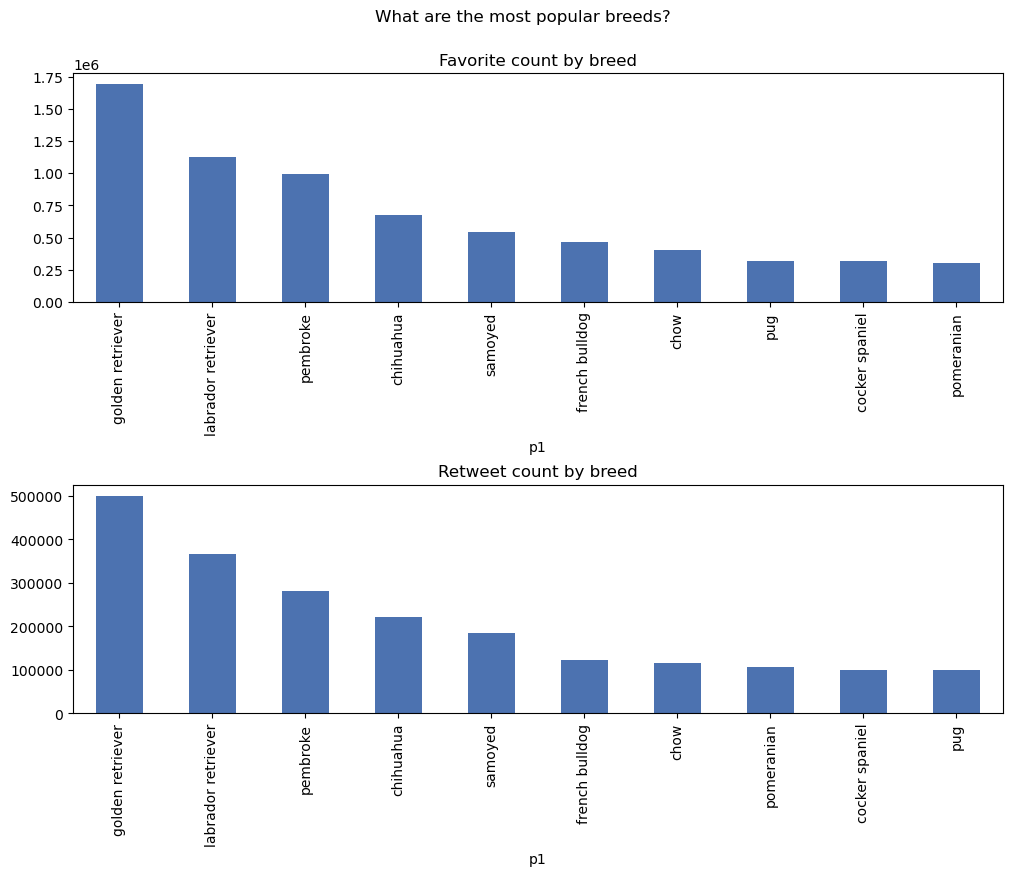

In [97]:
#Set matplotlib style
plt.style.use('seaborn-deep')
#Plotting
plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(8)
figure.set_figwidth(12)
figure.suptitle('What are the most popular breeds?')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
breed_favorite.plot(kind='bar', ax=axes[0]).set_title('Favorite count by breed')
breed_retweet.plot(kind='bar', ax=axes[1]).set_title('Retweet count by breed')
plt.savefig('output2.png', dpi=300, bbox_inches='tight')

# Conclusion:
The most popular breeds of dogs are Golden Retriever and Labrador retriever. In both 'retweet_count' and 'favorite_count' the most popular breeds are the same, only the order changes.

The four most popular breeds are:

Golden retriever

Labrador retriever

Chihuahua

Pembroke

An image depicting a Golden retriever on average gets 11,310.85 favorites and 3,874.47 retweets.